# ADVCANCED CLASSIFICATION EXAM #

© Explore Data Science Academy

Honour Code I THESGOFATSO JOHN, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract.

# Predict Overview: Language Identification

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society. With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

# Problem Statement

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

# Data overview

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages. From South African Government

# Table of Contents

1. Importing Packages


2. Loading Data


3. Data Engineering


4. Exploratory Data Analysis (EDA)


5. Modeling


6. Model Performance



# 1. Importing Packages

Back to Table of Contents

Github link. https://github.com/johnseabi/johnseabi_hackathon

Comet link. https://www.comet.com/johnseabi/south-african-language-identification-hack-2023/32087f96d1864773aaa8dc3532644376

In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from comet_ml import Experiment

import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import * 
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [2]:
# Create an comet experiment
experiment = Experiment(
    api_key="N1NsKJQP8GFJMv5OGYfWZgtPv",
    project_name="south-african-language-identification-hack-2023",
    workspace="johnseabi",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: Unknown error exporting current conda environment
COMET WARNING: Unknown error retrieving Conda package as an explicit file
COMET WARNING: Unknown error retrieving Conda information
COMET INFO: Experiment is live on comet.com https://www.comet.com/johnseabi/south-african-language-identification-hack-2023/841bf1c6f8b541c580e34daa1e99fe73



In [3]:
def read_file(path):
    '''This function reads the csv file given and displays the first five rows'''
    data = pd.read_csv(path)

    return data

# 2. Loading the Data

Back to Table of Contents

In [4]:
# Load train data
train_df = pd.read_csv('train_df.csv')

# Load test data
test_df = pd.read_csv('test_df.csv')

# 3. Exploratory Data Analysis (EDA)

Back to Table of Contents

3.1 Inspecting the Dataframes
We are going to look at the data before we do further explorotary analysis

In [5]:
#displaying the first rows
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [6]:
test_df["index"].value_counts()

1       1
3818    1
3794    1
3793    1
3792    1
       ..
1893    1
1892    1
1891    1
1890    1
5682    1
Name: index, Length: 5682, dtype: int64

In [7]:
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [8]:
# Count languages
train_df["lang_id"].value_counts() 

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [9]:
# Verifying the data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [10]:
# Establishing if the sentences have stop words
train_df['text'][0:5]

0    umgaqo-siseko wenza amalungiselelo kumaziko ax...
1    i-dha iya kuba nobulumko bokubeka umsebenzi na...
2    the province of kwazulu-natal department of tr...
3    o netefatša gore o ba file dilo ka moka tše le...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
Name: text, dtype: object

# 4. Analysis of the Language Distribution in the Dataset and Histogram

In [11]:
X = train_df['text']
y = train_df['lang_id']

In [12]:
Xhosa = train_df[y == "xho"]
English = train_df[y == "eng"]
Nso = train_df[y == "nso"]
Venda = train_df[y == "ven"]
Tswana = train_df[y == "tsn"]
Ndebele = train_df[y == "nbl"]
Zulu = train_df[y == "zul"]
Swati = train_df[y == "ssw"]
Tsonga = train_df[y == "tso"]
Sotho = train_df[y == "sot"]
Afrikaans = train_df[y == "afr"]

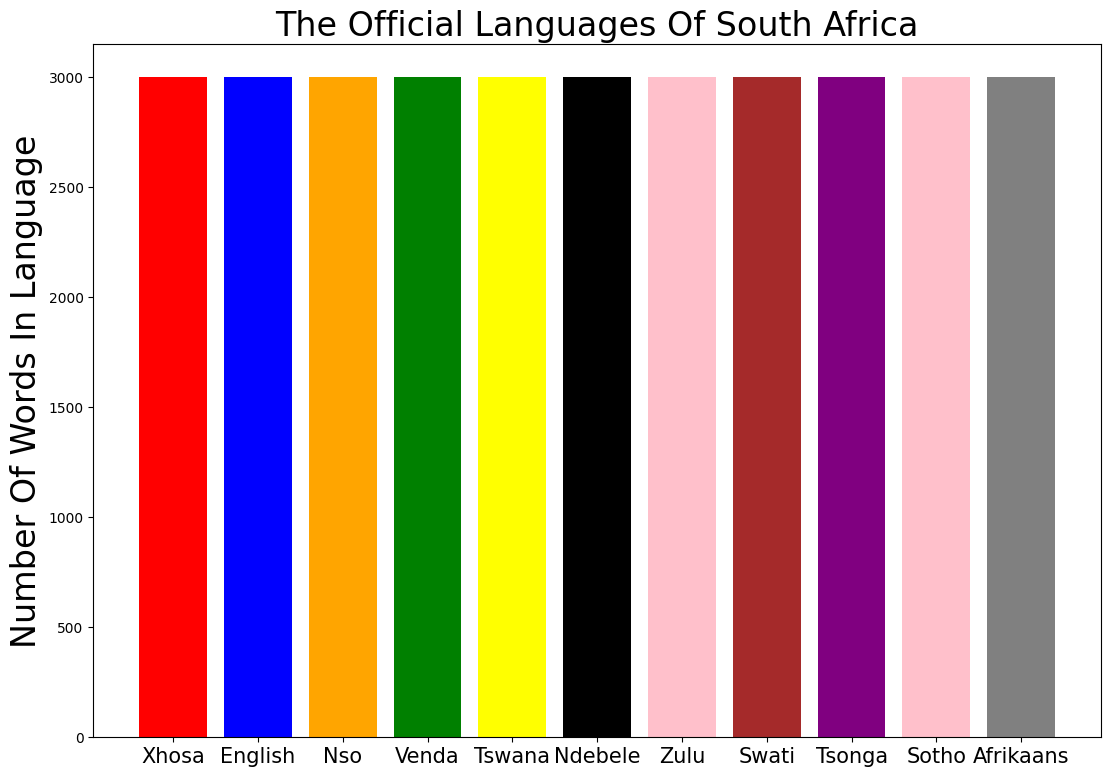

In [13]:
plt.figure(figsize=(13,9))
labels = y.unique()
heights = [len(Xhosa),len(English),len(Nso),len(Venda), len(Tswana), len(Ndebele), len(Zulu), len(Swati), len(Tsonga), len(Sotho), len(Afrikaans)]
plt.bar(labels,heights,color= ["red", "blue", "orange", "green", "yellow", "black", "pink", "brown", "purple", "pink", "grey"])
plt.xticks(labels,['Xhosa', 'English', 'Nso', 'Venda', 'Tswana', 'Ndebele', 'Zulu', 'Swati', 'Tsonga', 'Sotho', 'Afrikaans'])
plt.ylabel("No of Observations")
plt.title("The Official Languages Of South Africa", fontsize = 24)
plt.ylabel("Number Of Words In Language", fontsize = 24)
plt.xticks(labels,['Xhosa', 'English', 'Nso', 'Venda', 'Tswana', 'Ndebele', 'Zulu', 'Swati', 'Tsonga', 'Sotho', 'Afrikaans'], fontsize = 15)
plt.show()

# 5. Analysis of the language distribution in the dataset and pie chart


6.4
4.8


<Axes: ylabel='lang_id'>

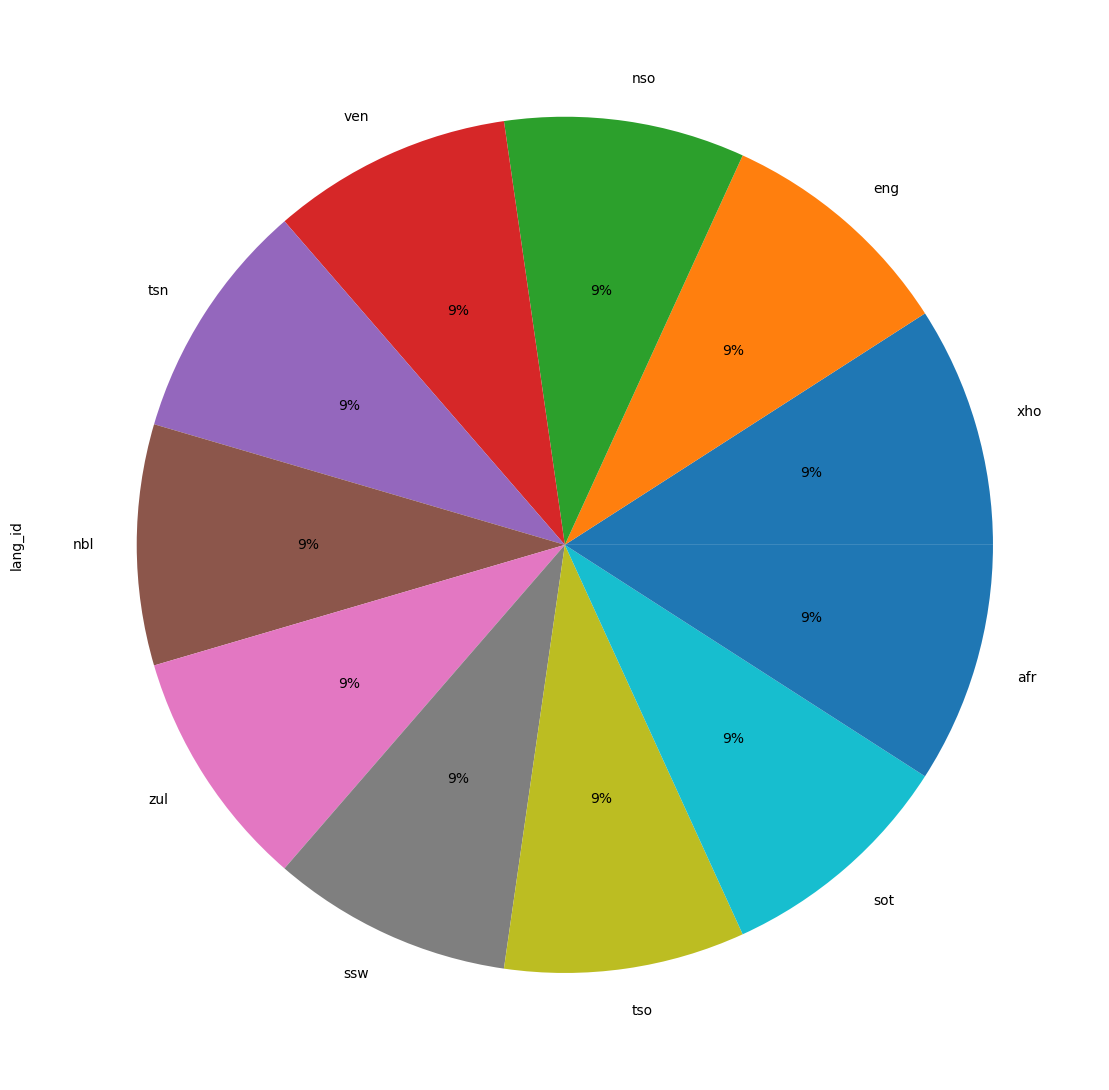

In [14]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 13.9
plot_size[1] = 13.9
plt.rcParams["figure.figsize"] = plot_size 

#  distribution of sentenses from the dataset
train_df.lang_id.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [16]:
temp = train_df.groupby('lang_id').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp['percentage'] = round((temp['text']/temp['text'].sum())*100,2)
temp.style.background_gradient(cmap='icefire')

,lang_id,text,percentage
0,afr,3000,9.090000
1,eng,3000,9.090000
2,nbl,3000,9.090000
3,nso,3000,9.090000
4,sot,3000,9.090000
5,ssw,3000,9.090000
6,tsn,3000,9.090000
7,tso,3000,9.090000
8,ven,3000,9.090000
9,xho,3000,9.090000


<Axes: title={'center': 'Density curve'}, xlabel='Text', ylabel='Density'>

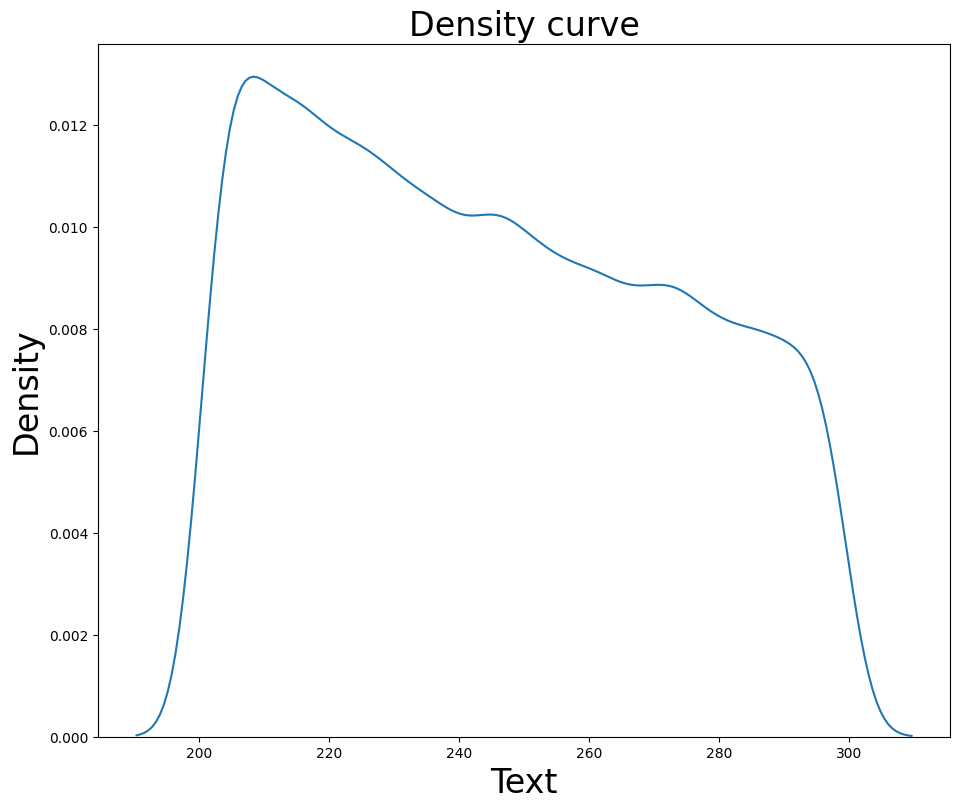

In [17]:
plt.figure(figsize=(11,9))
length = train_df["text"].str.len()
plt.title("Density curve", fontsize = 24)
plt.xlabel("Text", fontsize = 24)
plt.ylabel("Density", fontsize = 24)
sns.kdeplot(length)

# 6. Feature Engineering

Classifying the independent and dependent variables

Back to Table of Contents

In [18]:
X = train_df["text"]
y = train_df["lang_id"]
X_t = test_df['text']

# Text Preprocessing

Cleaning our dataset to remove symbols that will determine the quality of our model.

In [19]:
# Make text lowercase        
text = str(train_df["text"]).lower()

def cleaning(text):

# remove @user, #word and link
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
# remove punctuation    
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub('\n', '', text)
# remove numbers    
    text = ''.join([i for i in text[:] if not i.isdigit()])
    return text

train_df['clean_text']=train_df['text'].apply(lambda x: cleaning(x))
test_df['clean_text']=test_df['text'].apply(lambda x: cleaning(x))

In [20]:
train_df.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefat a gore o ba file dilo ka moka t e le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [21]:
test_df.head()

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta


Natural Language Processing: Tokenization,Lemmatization

In [22]:
def tokenization(text):
    """
    split the message into token of words
    Returns a token of each word contained in the sentence
    """
    text = word_tokenize(text)
    return text

train_df['tokenized_message'] = train_df['clean_text'].apply(lambda x:
                                                              tokenization
                                                              (x.lower()))
test_df['tokenized_message'] = test_df['clean_text'].apply(lambda x:
                                                            tokenization
                                                            (x.lower()))

In [23]:
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemma_df(text, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in text]
train_df['lemma'] = train_df['tokenized_message'].apply(lemma_df, args=(lemmatizer, ))
for i, t in enumerate(train_df.iloc[5]['tokenized_message']):
    print ('{:20s} --> {:10s}'.format(t, train_df.iloc[5]['lemma'][i]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\seabi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


dinyaki              --> dinyaki   
i                    --> i         
o                    --> o         
t                    --> t         
e                    --> e         
t                    --> t         
a                    --> a         
go                   --> go        
dirwa                --> dirwa     
gabedi               --> gabedi    
ka                   --> ka        
ngwaga               --> ngwaga    
di                   --> di        
tla                  --> tla       
lebelela             --> lebelela  
diphetogo            --> diphetogo 
t                    --> t         
a                    --> a         
mebaraka             --> mebaraka  
ya                   --> ya        
me                   --> me        
omo                  --> omo       
le                   --> le        
mekgwa               --> mekgwa    
ga                   --> ga        
mmogo                --> mmogo     
le                   --> le        
go                   --> go 

In [24]:
train_df.head()

,lang_id,text,clean_text,tokenized_message,lemma
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...","[umgaqo, siseko, wenza, amalungiselelo, kumazi..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...","[i, dha, iya, kuba, nobulumko, bokubeka, umseb..."
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...,"[the, province, of, kwazulu, natal, department...","[the, province, of, kwazulu, natal, department..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefat a gore o ba file dilo ka moka t e le...,"[o, netefat, a, gore, o, ba, file, dilo, ka, m...","[o, netefat, a, gore, o, ba, file, dilo, ka, m..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


In [25]:
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
def detokenization(text):
    detokenizer = Detok()
    text = detokenizer.detokenize(text)
    return text
train_df['detokenized_message'] = train_df['tokenized_message'].apply(lambda x:
                                                            detokenization(x))

test_df['detokenized_message'] = test_df['tokenized_message'].apply(lambda x:
                                                          detokenization(x))

In [26]:
train_df.head()

,lang_id,text,clean_text,tokenized_message,lemma,detokenized_message
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...","[umgaqo, siseko, wenza, amalungiselelo, kumazi...",umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...","[i, dha, iya, kuba, nobulumko, bokubeka, umseb...",i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...,"[the, province, of, kwazulu, natal, department...","[the, province, of, kwazulu, natal, department...",the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefat a gore o ba file dilo ka moka t e le...,"[o, netefat, a, gore, o, ba, file, dilo, ka, m...","[o, netefat, a, gore, o, ba, file, dilo, ka, m...",o netefat a gore o ba file dilo ka moka t e le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [27]:
test_df.head()

,index,text,clean_text,tokenized_message,detokenized_message
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala fa maemo a a kgethegileng a letlelel...,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ...",mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em...",uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]",tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t...",kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta,"[winste, op, buitelandse, valuta]",winste op buitelandse valuta


Comparing the raw text from the data set with what we have now

In [28]:
# two new columns in train data
train_df['Num_words_raw'] = train_df['text'].apply(lambda
                                                      x: len(str(x).split()))
train_df['Num_words_clean'] = train_df['clean_text'].apply(
                                                              lambda x:
                                                              len(str(
                                                                  x).split()))

# Difference in Number of word in raw data and clean
train_df['difference_in_wordsNo'] = abs(train_df['Num_words_raw'] -
                                        train_df['Num_words_clean'])

# test data frame
test_df['Num_words_raw'] = test_df['text'].apply(lambda
                                                    x: len(str(x).split()))
test_df['Num_words_clean'] = test_df['clean_text'].apply(lambda x:
                                                            len(str(x).split(
                                                            )))


# Difference in Number of words text and Selected Text
test_df['difference_in_wordsNo'] = abs(test_df['Num_words_raw']
                                       - test_df['Num_words_clean'])

In [29]:
train_df.head(3)

,lang_id,text,clean_text,tokenized_message,lemma,detokenized_message,Num_words_raw,Num_words_clean,difference_in_wordsNo
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...","[umgaqo, siseko, wenza, amalungiselelo, kumazi...",umgaqo siseko wenza amalungiselelo kumaziko ax...,24,25,1
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...","[i, dha, iya, kuba, nobulumko, bokubeka, umseb...",i dha iya kuba nobulumko bokubeka umsebenzi na...,31,33,2
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...,"[the, province, of, kwazulu, natal, department...","[the, province, of, kwazulu, natal, department...",the province of kwazulu natal department of tr...,37,38,1


In [30]:
test_df.head()

,index,text,clean_text,tokenized_message,detokenized_message,Num_words_raw,Num_words_clean,difference_in_wordsNo
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala fa maemo a a kgethegileng a letlelel...,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ...",mmasepala fa maemo a a kgethegileng a letlelel...,10,10,0
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em...",uzakwaziswa ngokufaneleko nakungafuneka eminye...,10,10,0
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]",tshivhumbeo tshi fana na ngano dza vhathu,7,7,0
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t...",kube inja nelikati betingevakala kutsi titsini...,7,7,0
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta,"[winste, op, buitelandse, valuta]",winste op buitelandse valuta,4,4,0


In [31]:
temp = train_df.groupby('lang_id').count()['detokenized_message'].reset_index().sort_values(by='detokenized_message',ascending=False)
temp['percentage'] = round((temp['detokenized_message']/temp['detokenized_message'].sum())*100,2) #checking for tweet sentiment percetage
temp.style.background_gradient(cmap='icefire')

,lang_id,detokenized_message,percentage
0,afr,3000,9.090000
1,eng,3000,9.090000
2,nbl,3000,9.090000
3,nso,3000,9.090000
4,sot,3000,9.090000
5,ssw,3000,9.090000
6,tsn,3000,9.090000
7,tso,3000,9.090000
8,ven,3000,9.090000
9,xho,3000,9.090000


In [32]:
train_df= train_df.drop('Num_words_clean', axis=1)
test_df= test_df.drop('Num_words_clean', axis=1)
train_df.head(2)

,lang_id,text,clean_text,tokenized_message,lemma,detokenized_message,Num_words_raw,difference_in_wordsNo
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...","[umgaqo, siseko, wenza, amalungiselelo, kumazi...",umgaqo siseko wenza amalungiselelo kumaziko ax...,24,1
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...","[i, dha, iya, kuba, nobulumko, bokubeka, umseb...",i dha iya kuba nobulumko bokubeka umsebenzi na...,31,2


In [33]:
train_df.head()

,lang_id,text,clean_text,tokenized_message,lemma,detokenized_message,Num_words_raw,difference_in_wordsNo
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...","[umgaqo, siseko, wenza, amalungiselelo, kumazi...",umgaqo siseko wenza amalungiselelo kumaziko ax...,24,1
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...","[i, dha, iya, kuba, nobulumko, bokubeka, umseb...",i dha iya kuba nobulumko bokubeka umsebenzi na...,31,2
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...,"[the, province, of, kwazulu, natal, department...","[the, province, of, kwazulu, natal, department...",the province of kwazulu natal department of tr...,37,1
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefat a gore o ba file dilo ka moka t e le...,"[o, netefat, a, gore, o, ba, file, dilo, ka, m...","[o, netefat, a, gore, o, ba, file, dilo, ka, m...",o netefat a gore o ba file dilo ka moka t e le...,40,4
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...,43,0


# 7. MODELING

VECTORIZATION


In [34]:
X_d = train_df['detokenized_message']
y = train_df['lang_id']

Text to numbers conversion

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X =vector.fit_transform(X_d)

In [37]:
#look at the shape
X.shape 

(33000, 206310)

In [38]:
X_t = cv.transform(X_t)
X_t.shape

(5682, 141958)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

# 8. Model Training and Prediction


In this part we train our model uisng different models from the training set and later predict the output for the test set.

# NAIVE BAYES

In [40]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

#fitting
model.fit(x_train, y_train)

#predicting the y labels
y_pred1 = model.predict(x_test)

#metrics reporting
acc = accuracy_score(y_test, y_pred1)

report = classification_report(y_test,y_pred1)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9992424242424243
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       0.99      1.00      1.00       574
         nbl       1.00      1.00      1.00       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      1.00      1.00       621
         zul       1.00      1.00      1.00       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# Random Forest Regressor

In [41]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)

#predict y labels
y_pred5 = rf_clf.predict(x_test)

#metrics report
acc = accuracy_score(y_test, y_pred5)

report = classification_report(y_test,y_pred5)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9901515151515151
Report is :               precision    recall  f1-score   support

         afr       0.99      1.00      1.00       587
         eng       0.99      1.00      0.99       574
         nbl       0.99      0.96      0.98       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       0.99      0.98      0.98       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       0.98      0.98      0.98       621
         zul       0.95      0.98      0.96       634

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



# BernoulliNB model

In [42]:
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)
y_pred3 = BNBmodel.predict(x_test)

#metrics report
acc = accuracy_score(y_test, y_pred3)

report = classification_report(y_test,y_pred3)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9965151515151515
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       1.00      0.98      0.99       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      1.00      1.00       621
         zul       0.97      1.00      0.98       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# Logistics Regression

In [43]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)

LRmodel.fit(x_train, y_train)
#predict y labels
y_pred2 = LRmodel.predict(x_test)

#metrics report
acc = accuracy_score(y_test, y_pred2)

report = classification_report(y_test,y_pred2)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9971212121212121
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       0.99      0.99      0.99       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      0.99      1.00       621
         zul       0.99      0.99      0.99       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# Support Vector Classifier

In [44]:
from sklearn.svm import SVC

svc = SVC( kernel='rbf')
svc.fit(x_train, y_train)
y_pred4 = svc.predict(x_test)

#metrics report
acc = accuracy_score(y_test, y_pred4)
report = classification_report(y_test,y_pred4)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9968181818181818
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       0.99      0.99      0.99       613
         nso       1.00      1.00      1.00       570
         sot       1.00      0.99      1.00       600
         ssw       1.00      1.00      1.00       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      1.00      1.00       621
         zul       0.99      0.99      0.99       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# Passive Aggresive Classifier

In [45]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
X = tfidf_vectorizer.fit_transform(train_df['text'])
X_t = tfidf_vectorizer.transform(test_df['text'])
Y = train_df.lang_id
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(X_train, Y_train)
pred = pass_tf.predict(X_test)


acc = accuracy_score(Y_test, pred)#metrics reporting
report = classification_report(Y_test,pred)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9981818181818182
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       578
         eng       1.00      1.00      1.00       591
         nbl       1.00      0.99      1.00       616
         nso       1.00      1.00      1.00       616
         sot       1.00      1.00      1.00       650
         ssw       1.00      1.00      1.00       555
         tsn       1.00      1.00      1.00       579
         tso       1.00      1.00      1.00       582
         ven       1.00      1.00      1.00       599
         xho       1.00      1.00      1.00       607
         zul       1.00      1.00      1.00       627

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# 9. Model Evaluation

Back to Table of Contents

In [46]:
names = ['MultinomialNB', 'Random Forest',
         'LogisticRegression', 'BernoulliNB','SVC','PassiveAggressiveClassifier'
         ]

In [47]:
classifiers = [
    MultinomialNB(),
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1),
    BernoulliNB(),
    SVC(kernel='rbf'),
    PassiveAggressiveClassifier() 
    ]

In [48]:
from sklearn import metrics
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(x_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall    = metrics.recall_score(y_train, y_pred, average='weighted')

    f1        = metrics.f1_score(y_train, y_pred, average='weighted')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='weighted')

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting MultinomialNB model...


... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting LogisticRegression model...
... predicting
... scoring
Fitting BernoulliNB model...
... predicting
... scoring
Fitting SVC model...
... predicting
... scoring
Fitting PassiveAggressiveClassifier model...
... predicting
... scoring
... All done!


# Results

In [53]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Random Forest,1.000000,1.000000,1.000000,1.000000,0.987271,229.016401
SVC,1.000000,1.000000,1.000000,1.000000,0.996820,183.169225
PassiveAggressiveClassifier,1.000000,1.000000,1.000000,1.000000,0.998030,0.490505
LogisticRegression,0.999886,0.999886,0.999886,0.999886,0.997122,48.211097
MultinomialNB,0.999697,0.999698,0.999697,0.999697,0.999243,0.348784
BernoulliNB,0.999205,0.999210,0.999205,0.999205,0.996527,0.140486


# Graph to compare the different metrics

<Axes: xlabel='Classifier'>

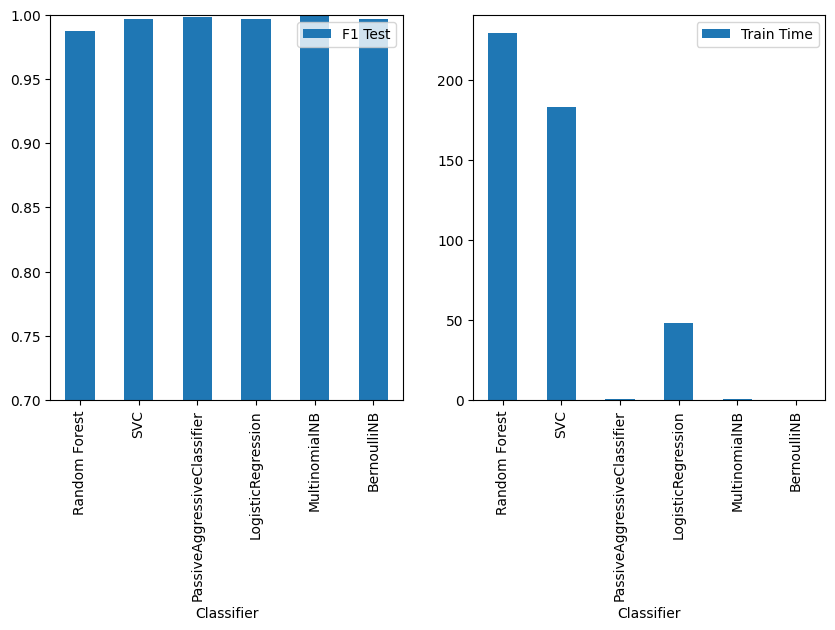

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.70,1.00])
results.plot(y='Train Time', kind='bar', ax=ax[1])

Back to Table of Contents


1 The random forest model took a long to fit the data and performed least.

2 Multinormal Naive Bayes took the shorter time to fit data.

3 BernoulliNB performed the best and took very little time.

To comprehend the performance of the BernoulliNB model we'll look at the confusion matricx and classification report results

In [55]:
confusion['BernoulliNB']

array([[2412,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1],
       [   0, 2426,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 2375,    0,    0,    0,    0,    0,    0,    0,   12],
       [   0,    0,    0, 2430,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2400,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 2371,    0,    0,    0,    0,    5],
       [   1,    0,    0,    0,    0,    0, 2418,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 2403,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 2401,    0,    0],
       [   0,    2,    0,    0,    0,    0,    0,    0,    0, 2377,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2366]],
      dtype=int64)

# The accuracy of the LogisticRegression model is the best at 0.9998 indicating our model is performing well.

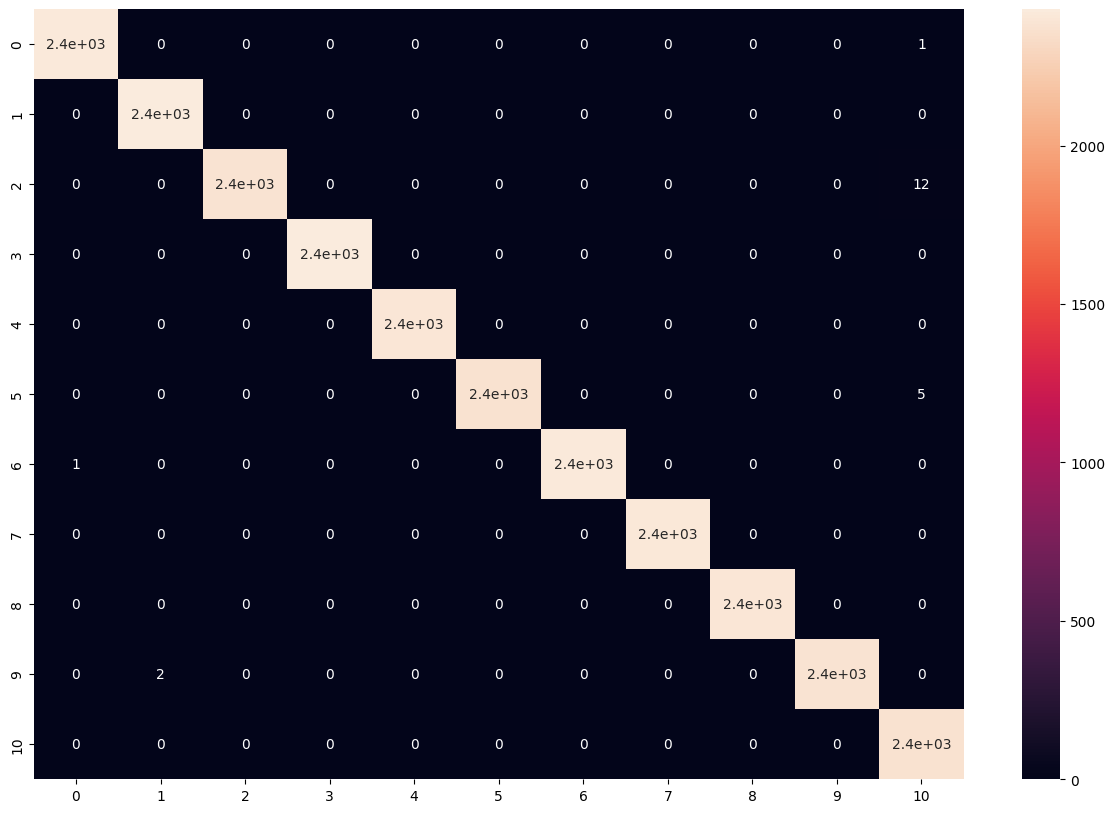

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion['BernoulliNB'], annot = True)
plt.show()

# Predictions with the test dataset

In [57]:
X_t.shape 

(5682, 141680)

In [ ]:
text_pred= BNBmodel.predict(X_t) 

predictions for kaggle.

In [59]:
kaggle_bnb = test_df[['index']]
kaggle_bnb['lang_id']= text_pred
kaggle_bnb.to_csv('NLPclassification.csv', index = None) 

NameError: name 'text_pred' is not defined

In [60]:
read_file('NLPclassification.csv')

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot


# 10. Conclusion

BernoulliNB has proven to be a better model in language for this NLP process.